In [2]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [4]:
shp_file_name = "C:\\Users\\Arfe\\1161\\Data-Project\\Data_Project\\GDA2020\\nsw_localities.shp"
zip_file_name = "nsw_locality_polygon_shp.zip"
web_file_path = (
    "https://data.gov.au/data/dataset/91e70237-d9d1-4719-a82f-e71b811154c6/resource/89af4ef8-7d45-4535-be38-221025695900/download/nsw_loc_gda2020.zip"
)

def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

burbs = gp.GeoDataFrame.from_file(shp_file_name)
burbs.set_crs(epsg=5234, inplace=True, allow_override=True) 
burbs.sample(2)


loading from file
done


,LC_PLY_PID,LOC_PID,DT_CREATE,LOC_NAME,LOC_CLASS,STATE,geometry
1398,lcp6cace79ba9b8,loce4d061e40ced,2022-07-04,East Tamworth,Gazetted Locality,NSW,"POLYGON ((150.943 -31.075, 150.944 -31.075, 15..."
4100,lcp95187c068a4c,locaf19cbe22f55,2021-06-24,Upper Fine Flower,Gazetted Locality,NSW,"POLYGON ((152.719 -29.193, 152.730 -29.195, 15..."


In [5]:
if os.path.isfile("listings.csv"):
    filepath = "listings.csv"
    print("loading from file")
else:
    filepath = ""
    print("loading from the internet")

listing_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [6]:
def add_centroid(row):
    return row.geometry.centroid

burbs["centroid"] = burbs.apply(add_centroid, axis=1)

<Axes: >

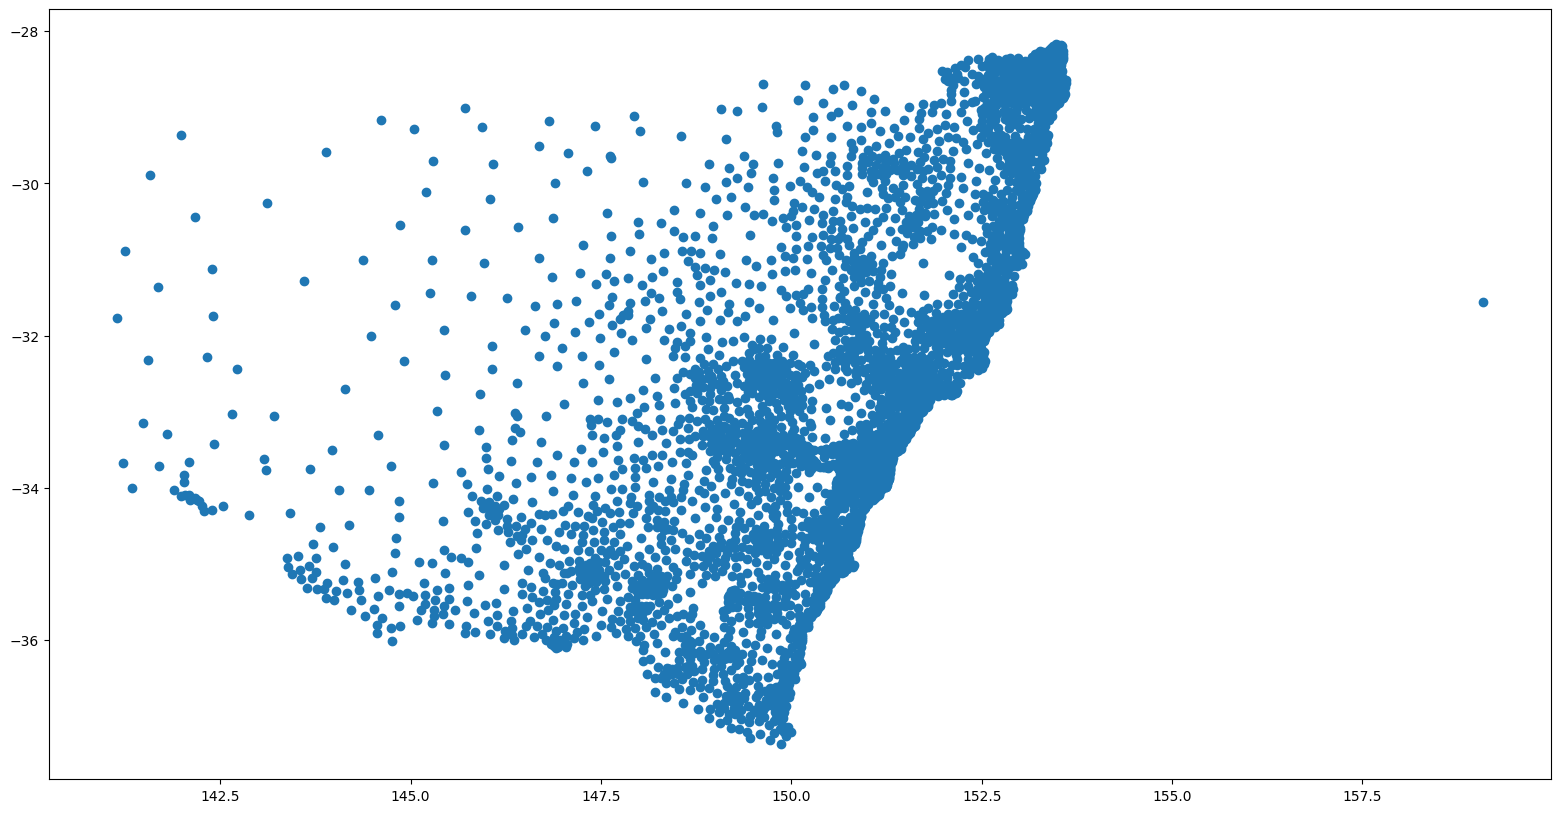

In [7]:
burbs.centroid.plot()

In [8]:
listing_data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4688422,https://www.airbnb.com/rooms/4688422,20230606052803,2023-06-06,city scrape,Rental unit in Manly · ★4.71 · 2 bedrooms · 3 ...,Attractive discounts offered for long term boo...,Once you get to Manly you won't want to leave ...,https://a0.muscache.com/pictures/airflow/Hosti...,13396297,...,4.97,4.94,4.65,PID-STRA-26284,t,1,1,0,0,0.35
1,39681254,https://www.airbnb.com/rooms/39681254,20230606052803,2023-06-06,previous scrape,Rental unit in Manly · ★5.0 · 1 bedroom · 1 be...,Lovely apartment with great views over Little ...,"Little Manly Beach and cafe at the doorstep, a...",https://a0.muscache.com/pictures/2552695c-1207...,25316226,...,5.00,5.00,5.00,NaN,t,1,1,0,0,0.07
2,43619457,https://www.airbnb.com/rooms/43619457,20230606052803,2023-06-06,previous scrape,Rental unit in Manly · 3 bedrooms · 3 beds · 2...,A stunning penthouse 3 bedroom 2 bathroom apar...,"Spoiled for lifestyle choices, step outside yo...",https://a0.muscache.com/pictures/2725ee7b-0098...,26816558,...,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
3,39446599,https://www.airbnb.com/rooms/39446599,20230606052803,2023-06-06,previous scrape,Guesthouse in Eastwood · 1 bedroom · 1 bed · 1...,This is a fully furnished independent flat att...,"The area is very handy close to restaurants, p...",https://a0.muscache.com/pictures/90cc2454-5a17...,152329169,...,NaN,NaN,NaN,PID-STRA-26166,f,1,1,0,0,NaN
4,43629106,https://www.airbnb.com/rooms/43629106,20230606052803,2023-06-06,city scrape,Rental unit in Manly · ★5.0 · 2 bedrooms · 4 b...,Freshly styled beachfront beauty. From its exc...,"Manly is uniquely placed, just across the harb...",https://a0.muscache.com/pictures/5aff4f53-ba67...,348372472,...,5.00,5.00,4.81,PID-STRA-10013,f,1,1,0,0,0.85


In [9]:
listing_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

<Axes: >

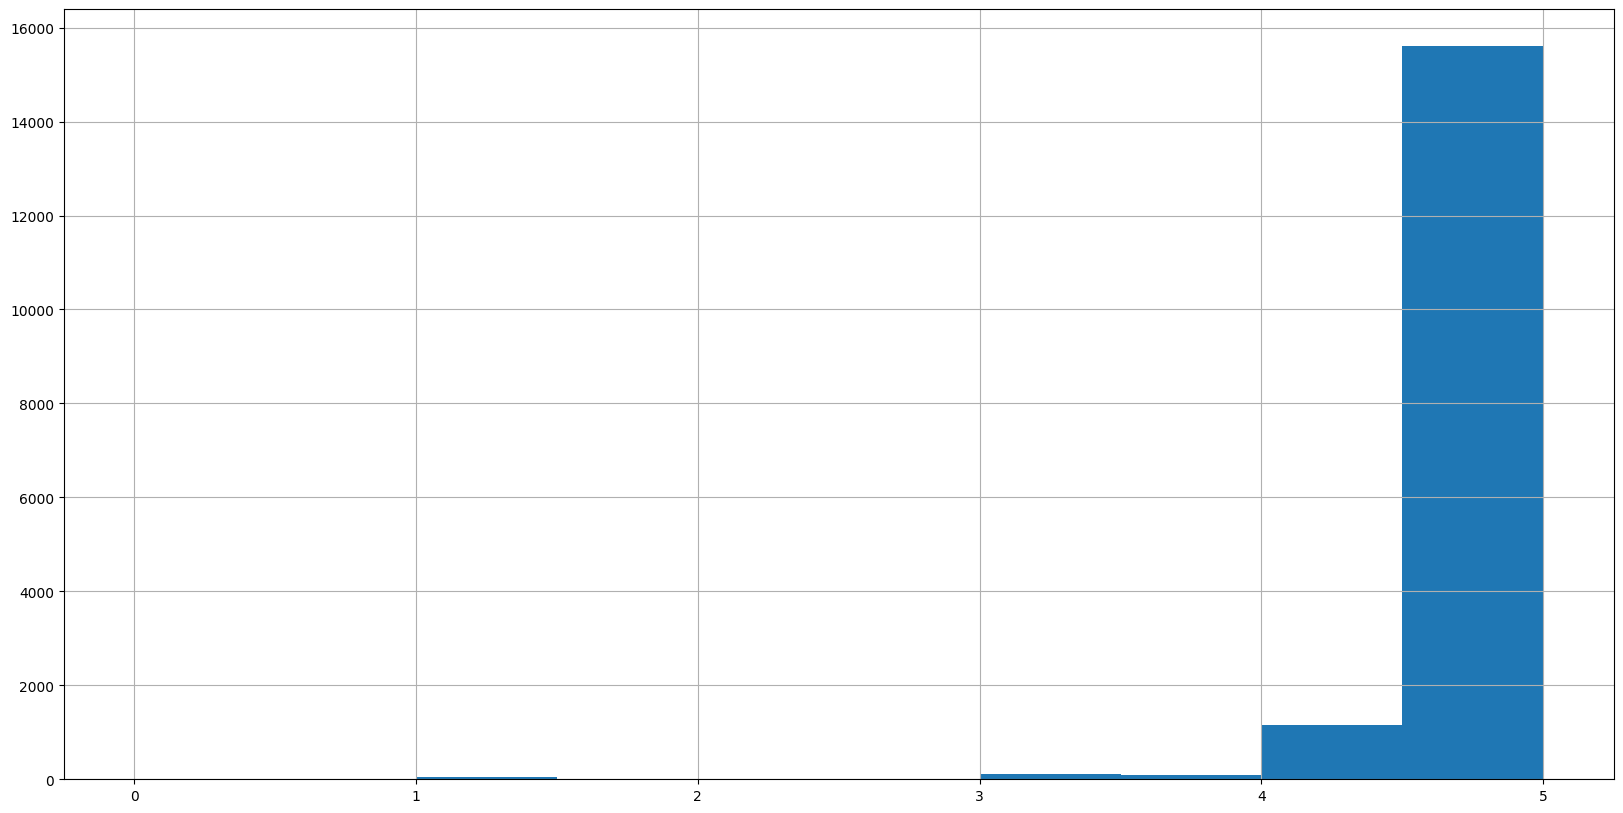

In [10]:
listing_data["review_scores_location"].hist()

<Axes: >

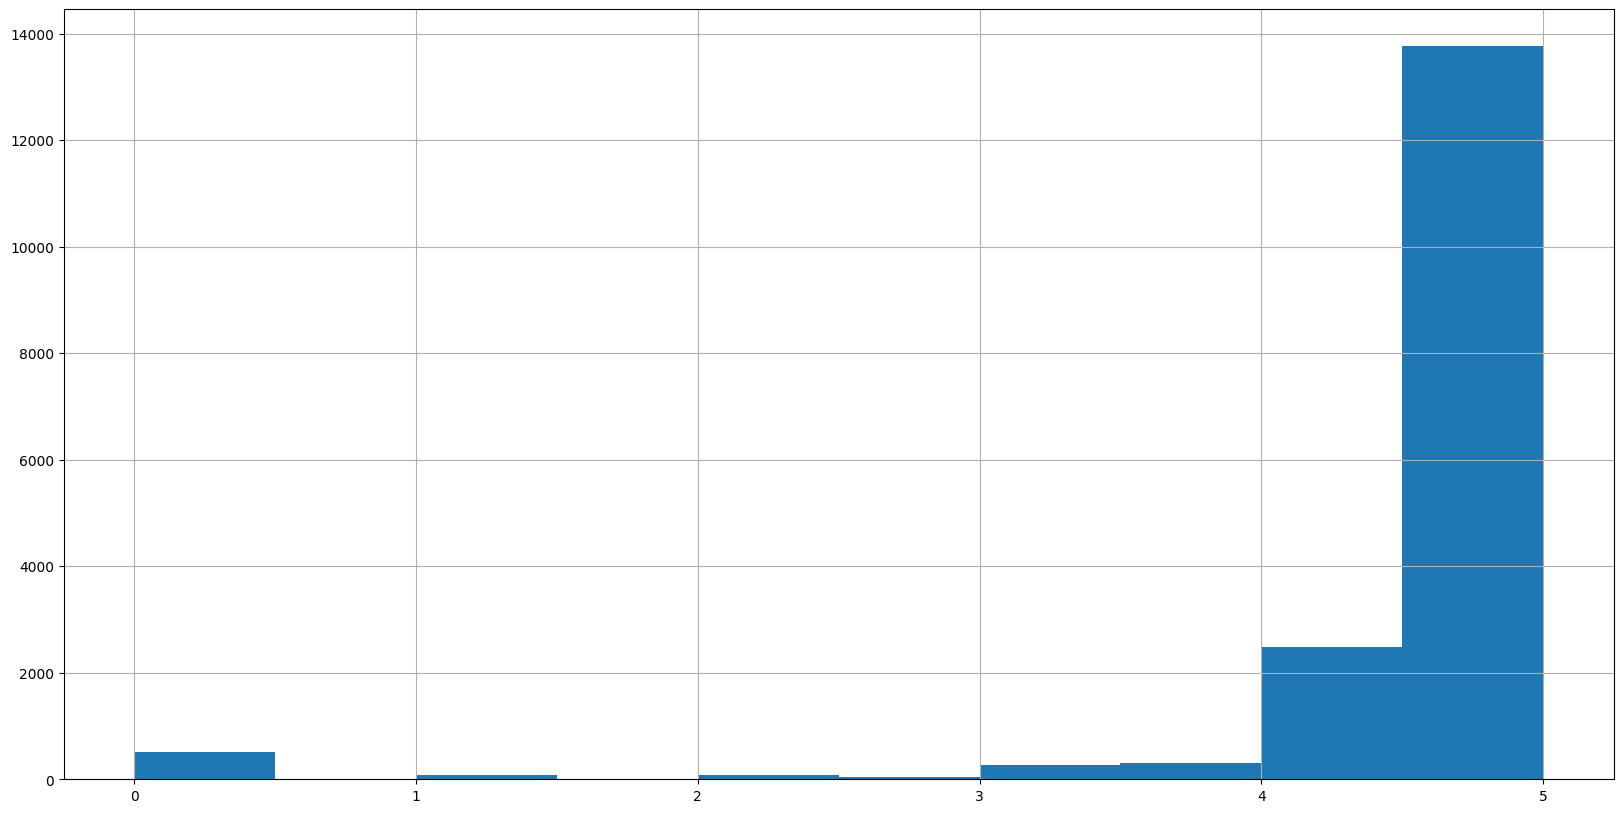

In [11]:
listing_data["review_scores_rating"].hist()

<Axes: >

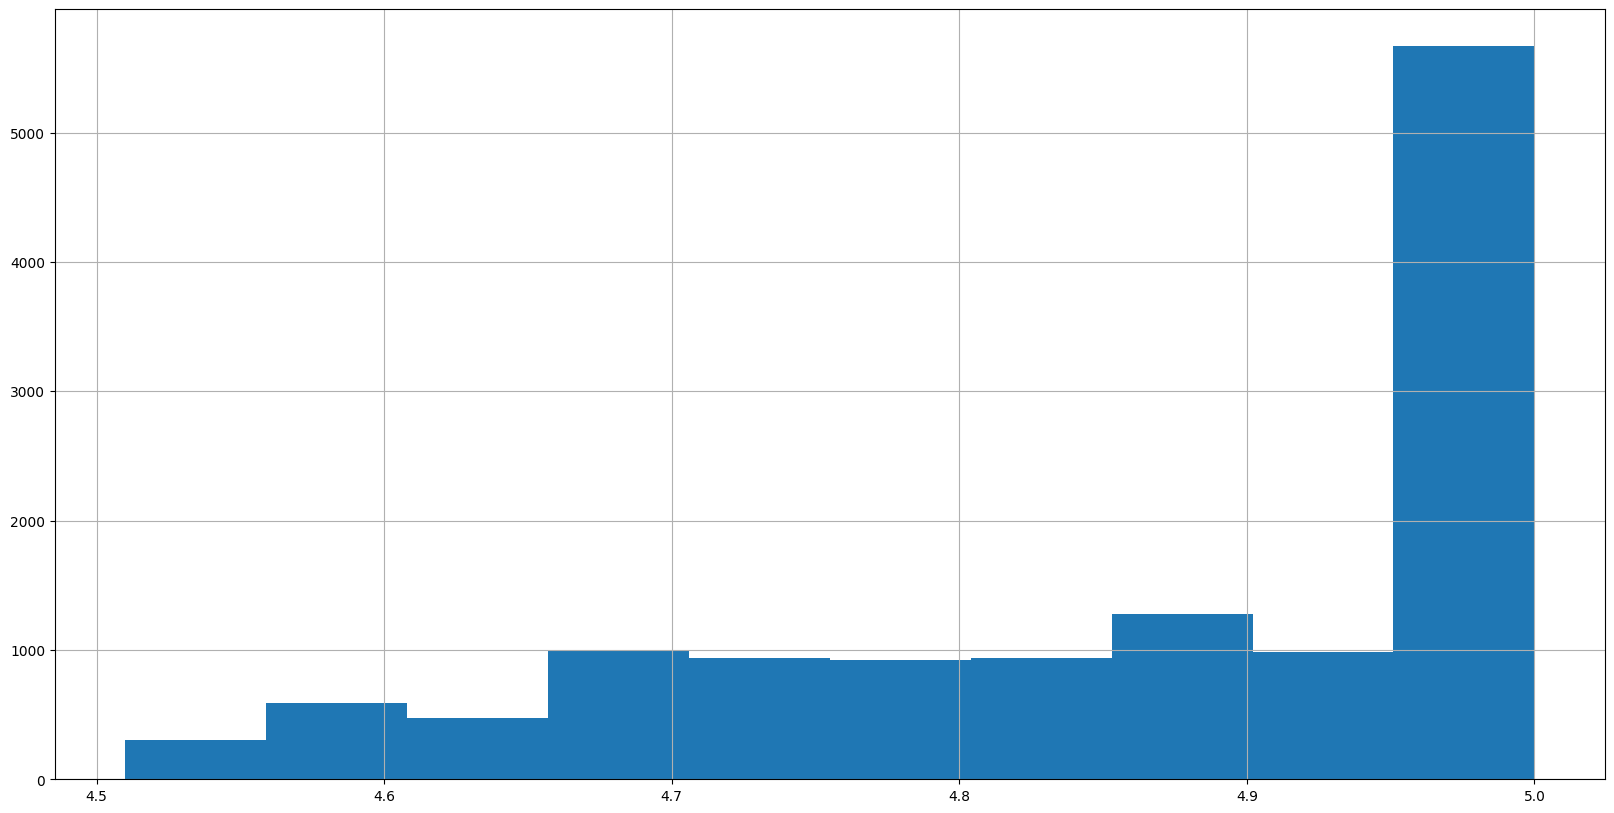

In [12]:
listing_data.review_scores_rating[listing_data.review_scores_rating > 4.5].hist()

<Axes: >

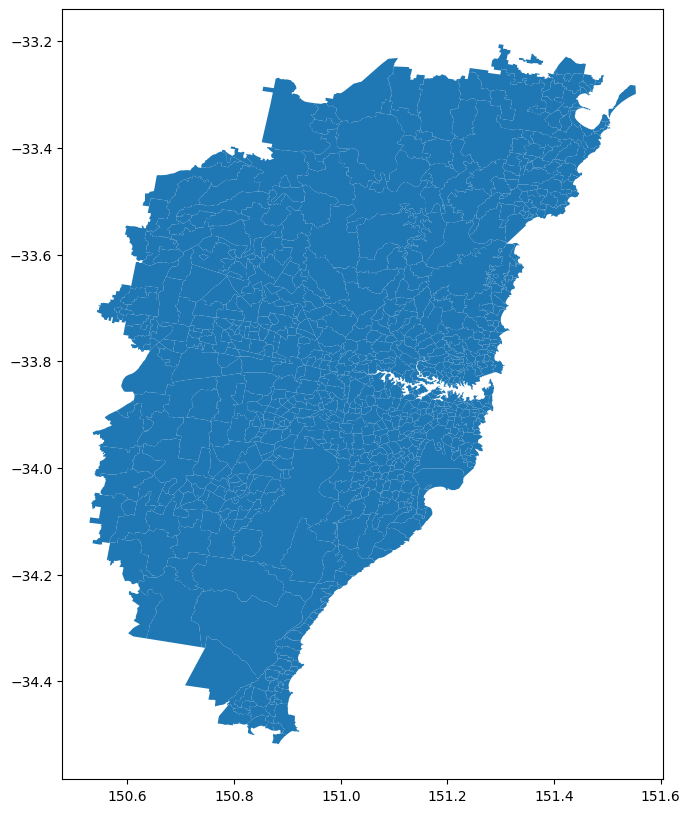

In [73]:
right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)
burbs["distance_from_UNSW"] = burbs.centroid.distance(right_here)

close_burbs = burbs[burbs.distance_from_UNSW < 0.7]
close_burbs.plot()


In [14]:
suburb = 'Parramatta'

burbs.LOC_NAME[burbs.LOC_NAME == suburb]




3220    Parramatta
Name: LOC_NAME, dtype: object

In [43]:
# what this does is it takes the listing CSV which we have, goes in there takes the Latitude and Longitude values, and it creates a new column called Geometry which is what Geopandas can interpret as a point on the map. The power of this is it did it automatically for all 20000+ rows
listing_data_geo = gp.GeoDataFrame(listing_data, geometry = gp.points_from_xy(listing_data.longitude,listing_data.latitude))

<Axes: >

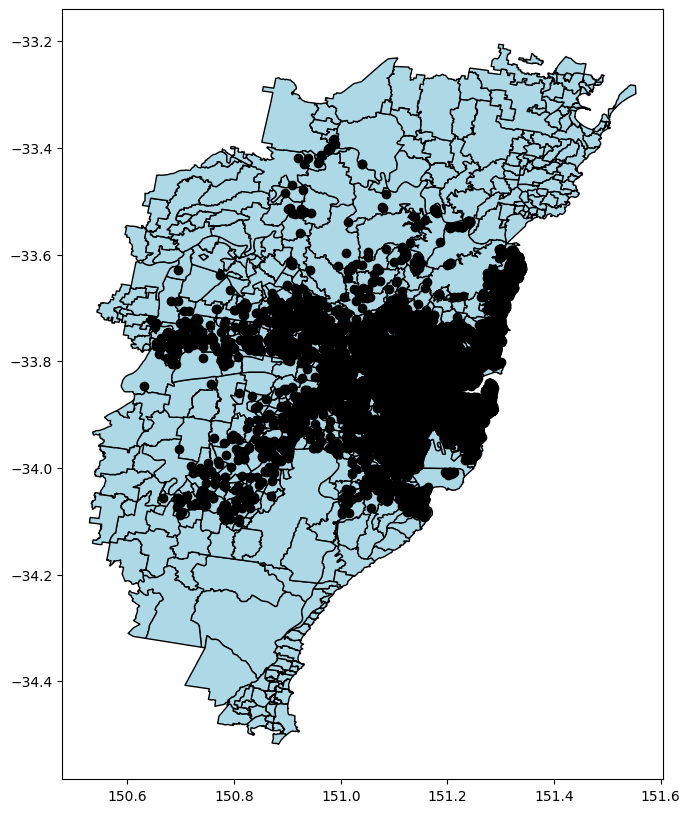

In [74]:
axis = close_burbs.plot(
    color = 'lightblue', edgecolor = 'black'
)
listing_data_geo.plot(ax = axis, color = 'black')